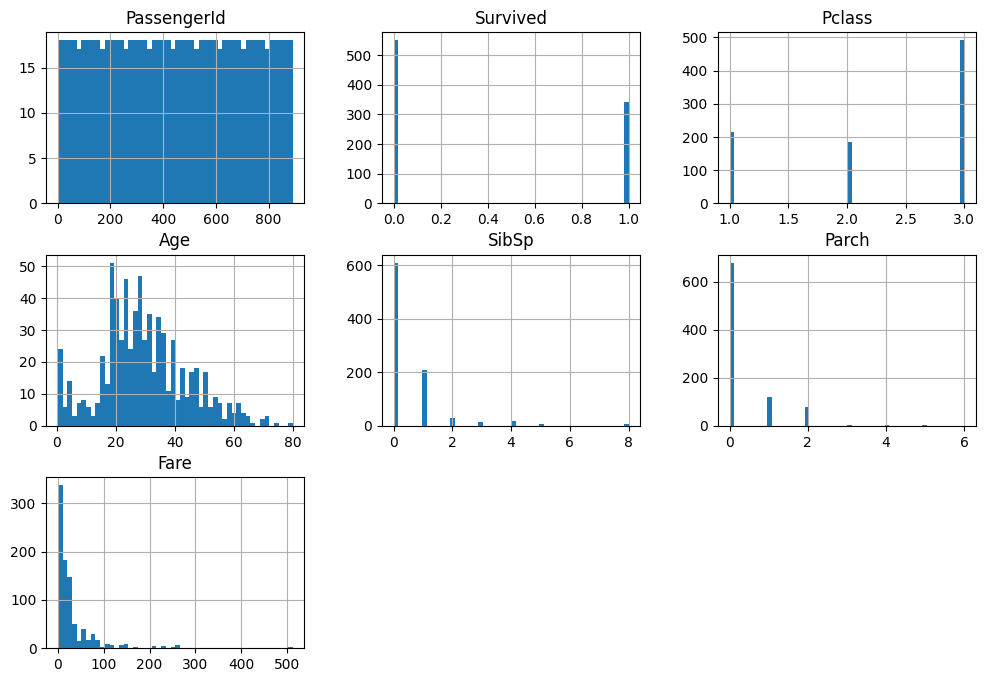

In [1]:
import pandas as pd

titanic_data = pd.read_csv("titanic_dataset.csv")

import matplotlib.pyplot as plt
titanic_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [2]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_data, test_data = shuffle_and_split_data(titanic_data, 0.2)


print("train data size: ", len(train_data))
print("test data size: ", len(test_data))

train data size:  713
test data size:  178


In [5]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

y_true = test_data["Survived"]
accuracy_score(y_true, y_pred)

0.797752808988764